<a href="https://colab.research.google.com/github/MikFerrari/SMLHF_GoogleColabs/blob/main/2021_10_19_TP2_regression_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlook #


In this colab, we will study basic linear and non-linear regression algorithms. Regression is another name for function approximation, it consists in fitting a function to a set of points, as shown below.


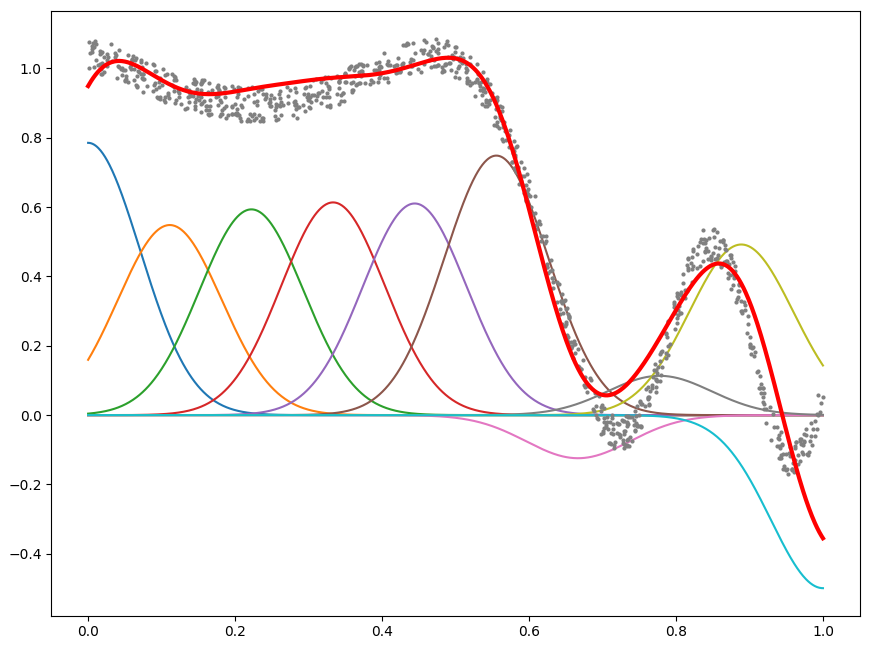

## Introduction ##

The objective of regression or function approximation is to create a model from observed data.
The model has a fixed structure with parameters (like the coefficients of a polynomial for instance),  and regression consists in adjusting these parameters to fit the data. In machine learning, it is a very important technique since having a good model enables better predictions and performance.

Generally speaking, given some data $\{ ({\bf x}^{(i)}, {\bf y}^{(i)}) \}$, the goal is to adjust a model ${\bf y} = f({\bf x})$ so that the *learned* function $f$ accounts for datapoints and generalize well to other unseen points. 

The simplest case is linear regression, which assumes a relation of type ${\bf y} = {\bf A}{\bf x} + {\bf V} {\bf b}$ between the data ${\bf x}$ and ${\bf y}$.

Several methods exist to adjust the parameters ${\bf A}$ and ${\bf V} {\bf b}$, the most well-known being the least squares method (or least norm in the multivariate case).

In this lab, we will always assume that ${\bf y}$ is of dimension 1 (and write $y$ instead of ${\bf y}$ in what follows).


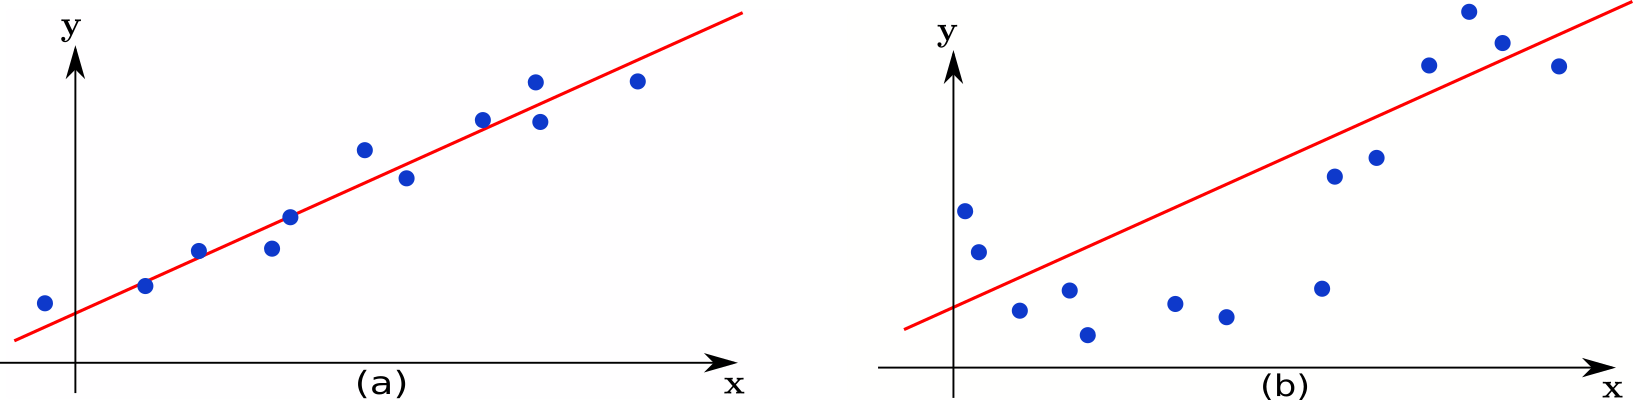

Often, linear models are not enough (see above, on the left a linear regression is OK, but on the right it is not) and we must rely on nonlinear models.
Here, we focus on the case where $f$ can be written as a sum of $k$ functions parametrized by vectors ${\boldsymbol{\theta}}_i$:
$$
f({\bf x})  = \sum_{i=1}^k f_{\boldsymbol{\theta}_i}({\bf x}).
$$

In particular, we will use Gaussian functions.


### Weighted sums of Gaussian functions ###

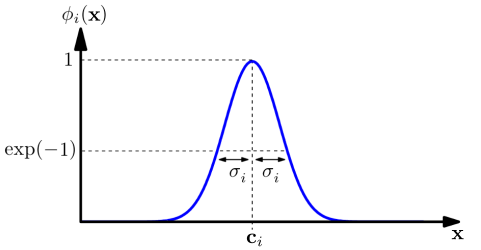


Gaussian functions $\phi_i({\bf x}) = \exp(-\frac{({\bf x}-{\bf V} c_i)^2}{\sigma_i^2})$ are almost equal to zero everywhere except in a neighborhood of ${\bf V} c_i$, which represents the ``center'' of the Gaussian (see above). The value of $\sigma_i$ determines how large this neighborhood is.

Then weighted Gaussian functions $f_{\boldsymbol{\theta}_i}$ can be written: 

$$
f_{\boldsymbol{\theta}_i} = {\bf \theta}_i \phi_i({\bf x}) = {\bf \theta}_i \exp\left(-\frac{({\bf x}-{\bf V} c_i)^2}{\sigma_i^2}\right).
$$

In these labs, the centers of the Gaussian functions are fixed in advance, and evenly distributed in the input space.
Besides, all the $\sigma_i$'s are usually set to the same value. Thus weighted Gaussian functions $f_{\boldsymbol{\theta}_i}$ have a unique scalar parameter which is their weight $\boldsymbol{\theta}_i$.

# Provided code and documentation #


The numpy reference guide is here: http://docs.scipy.org/doc/numpy/reference/


We provide a few useful classes and the infrastructure to perform these labs.

## Data generation ##

Two functions to generate points corresponding to a noisy linear and a noisy nonlinear model are provided in the *SampleGenerator* class in the *sample_generator.py* file.

## Batch of data ##

The *batch.py* file contains the *Batch* class. This class is used to collect a batch of linear or non-linear data, either in a single batch or incrementally.

## Vectors of Gaussian functions ##

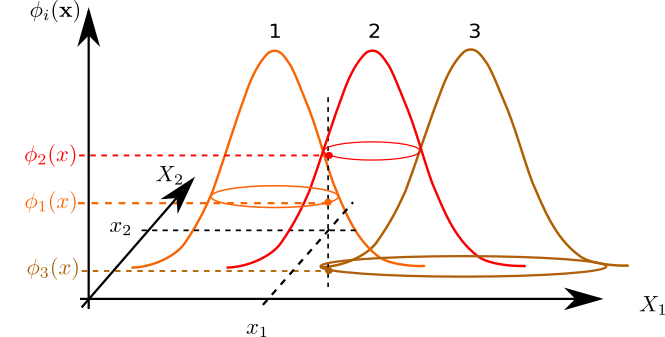


A class *Gaussians* is provided in *gaussians.py* to represent a vector of Gaussian feature functions $\phi({\bf x})$ of an input vector ${\bf x}$, as used in RBFNs and Locally Weighted Regression (LWR) (see below). The number of elements of $\phi({\bf x})$ (i.e. the number $k$ of Gaussian functions) is defined by the *nb_features* attribute.

In regression algorithms, we often use a transpose of $\phi({\bf x})$. But in *numpy*, transposing a standard one-dimensional vector does not work as expected: the result of the tranpose operator is the same vector. As a result, **we choose to code the $\phi({\bf x})$ function so that its output is a vertical vector. When one needs to get the flat horizontal vector corresponding to** $\phi({\bf x})$, **one needs to use** *phi_output(x).transpose()[0]*. 

Given some input vector ${\bf x}$, the function *phi_output(x)* returns the vector of the output of (non-weighted) Gaussian functions applied to ${\bf x}$.
In the particular case where $x$ is a scalar, it is transformed into a one element vector to keep consistent with the N-dimensional case.

Note that the input of the (multivariate) Gaussian functions is of the same dimension as ${\bf x}$, but their output is one-dimensional (see the figure above).

## Function approximators ##


We consider three families of approximation models: linear models , radial basis function networks and locally weigthed regression models. In all these models, the *theta* attribute represents the vector of parameters to be optimized. The *f(self, x)* function represents the function approximator output for a given input *x*, to be optimized. The parameters used by $f$ is the *theta* attribute.


For instance, for RBFNs, we consider a vector of $k$ Gaussian functions $\phi({\bf x}) = (\phi_1({\bf x}) \ \phi_2({\bf x}) \cdots \phi_k({\bf x}))^\intercal$, a vector of weights $\boldsymbol{\theta} = (\boldsymbol{\theta}_1 \ \boldsymbol{\theta}_2 \cdots \boldsymbol{\theta}_k)^\intercal$, and a vector of weighted Gaussian functions $f({\bf x}) = \phi({\bf x})^\intercal \boldsymbol{\theta}$.

These function approximation models come with various *train_...(self, ...)* functions that must be filled.


## Visualization ##

For all the regression methods described below, as illustrated in the figure at the top of this colab, after executing it, the observed data are shown by points, and the red curve is the *learned* function $f$ corresponding to the parameters $\boldsymbol{\theta}$ that have been incrementally adjusted. When this applies, the other curves correspond to the $f_{\boldsymbol{\theta}_i}({\bf x})$ functions, they show the decomposition of $f$, which is the sum of all these functions. All visualization functions are in the *plot()* function of each approximator.

# Installation #

In [ ]:
!pip install git+https://github.com/osigaud/regressionLabs

  Cloning https://github.com/osigaud/regressionLabs to /tmp/pip-req-build-fs2y_8_s
  Running command git clone -q https://github.com/osigaud/regressionLabs /tmp/pip-req-build-fs2y_8_s
  Created wheel for regressionLabs: filename=regressionLabs-0.1.dev0+50777e314edb11701548d4ad75a02fbcb162e1ab-py3-none-any.whl size=4677 sha256=9cc3a81f045456095b7b10d306406f8c31eb3a32d430f86566fa5e372caeb543
  Stored in directory: /tmp/pip-ephem-wheel-cache-d17wgaaw/wheels/90/95/22/662b8299ded32791ed46281dd9e05d20cc37c14cc6a87e9eef
Successfully built regressionLabs


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt


from regression_labs.batch import Batch
from regression_labs.gaussians import Gaussians

# Questions #


We study three basic regression algorithms: the Linear Least Squares (LLS), Radial Basis Function Networks (RBFNs) using various fitting algorithms, and Locally Weighted Regression (LWR).

We consider either a batch approach or an incremental one. In the batch approach, we consider a batch of data consisting of $N$ $\{ ({\bf x}^{(i)}, y^{(i)}) \}_{1 \leq i \leq N}$ pairs.
In the incremental one, we get an additional pair of data $({\bf x}^{(t)}, y^{(t)})$ at each time step $t$.

In the general case, the input data ${\bf x}$ is of dimension $d$, and we have ${\bf x} = (x_1 \ x_2 \cdots x_d)^\intercal$.
Under algebraic form, the batch of data is rewritten $({\bf X}, {\bf y})$ where ${\bf X}$ is a $N \times d$ matrix and ${\bf y}$ is a $N$ dimensional vector.

To solve a linear least square problem, we want to use a model of the form $f_\boldsymbol{\theta}({\bf X}) = \boldsymbol{\theta}^\intercal{\bf X} + {\bf b}$.
To deal more elegantly with the intercept ${\bf b}$, we extend the vectors ${\bf x}$ with an additional dimension using $\bar{\bf x} = (x_1 \ x_2 \cdots x_d \ 1)^\intercal$,
and we redefine the Gram matrix as
$$
\bar{\bf x}=\left(
\begin{array}{ccccc}
  {\bf x}_{1,1}&{\bf x}_{1,2}&\cdots &{\bf x}_{1,d} &1\\
  {\bf x}_{2,1}&{\bf x}_{2,2}&\cdots &{\bf x}_{2,d} &1\\
  \vdots  &\vdots  &\ddots &\vdots   &\vdots\\
  {\bf x}_{N,1}&{\bf x}_{N,2}&\cdots &{\bf x}_{N,d} &1\\
\end{array}
\right).
$$

From the list of vectors *x_data* provided by the sample generator, $\bar{\bf x}$ can be obtained by first transforming *x_data* into a *numpy array* and transposing using *x_data = numpy.array(x_data).transpose()*, and then adding the ones with:

In [ ]:
x = numpy.hstack((x_data, numpy.ones((x_data.shape[0], 1))))

## Batch Linear Least squares ##


The linear least squares method finds the best linear model from a batch of data, using

$$
  \boldsymbol{\theta}^* = \min_{\boldsymbol{\theta}} \underbrace{\|{\bf y}-\boldsymbol{\theta}^\intercal\bar{\bf x}\|^2}_{L(\boldsymbol{\theta})}.
$$

The parameters for the optimal model are given by:

$$
  \boldsymbol{\theta}^* = (\bar{\bf x}^\intercal\bar{\bf x})^{-1}{\bar{\bf x}}^\intercal{\bf y}.
$$

The code below provides the *Line* class. The way to get the linear least square model using *stats.linregress(x_data, y_data)* is given in the *train_from_stats(self, x_data, y_data)* function. **You just need to print the obtained values and set the *self.theta* attribute correctly**.


  Similarly, fill the *train(self, x_data, y_data)* function so as to perform the same linear least square computation using the above equation, without using *stats.linregress(x_data, y_data)*. Does it provide exactly the same results as with the *train_from_stats(self, x_data, y_data)* function?

In [ ]:
from scipy import stats


class Line:
    def __init__(self, batch_size):
        self.nb_dims = 1
        self.theta = np.zeros(shape=(batch_size, self.nb_dims))

    def f(self, x):
        """
        Get the FA output for a given input variable(s)

        :param x: A single or vector of dependent variables with size [Ns] for which to calculate the features

        :returns: the function approximator output
        """
        if np.size(x) == 1:
            xl = np.vstack(([x], [1]))
        else:
            xl = np.vstack((x, np.ones((1, np.size(x)))))
        return np.dot(self.theta, xl)

    # ----------------------#
    ## Training Algorithms ##
    # ----------------------#

    def train_from_stats(self, x_data, y_data):
        # Finds the Least Square optimal weights: python provided version
        slope, intercept, r_value, _, _ = stats.linregress(x_data, y_data)

        #TODO: Fill this

    def train(self, x_data, y_data):
        # Finds the Least Square optimal weights
        x_data = np.array([x_data]).transpose()
        y_data = np.array(y_data)
        x = np.hstack((x_data, np.ones((x_data.shape[0], 1))))

        #TODO: Fill this

        # ----------------------#
        # # Training Algorithm ##
        # ----------------------#

    def train_regularized(self, x_data, y_data, coef):
        # Finds the regularized Least Square optimal weights
        x_data = np.array([x_data]).transpose()
        y_data = np.array(y_data)
        x = np.hstack((x_data, np.ones((x_data.shape[0], 1))))

        #TODO: Fill this
 

    # -----------------#
    # # Plot function ##
    # -----------------#

    def plot(self, x_data, y_data):
        xs = np.linspace(0.0, 1.0, 1000)
        z = self.f(xs)

        plt.plot(x_data, y_data, 'o', markersize=3, color='lightgreen')
        plt.plot(xs, z, lw=2, color='red')
        plt.show()

Let us now visualize whether your code works.
 

In [ ]:
batch = Batch()
model = Line(batch.batch_size)
batch.make_linear_batch_data()
start = time.process_time()
model.train(batch.x_data, batch.y_data)
print("LLS time:", time.process_time() - start)
model.plot(batch.x_data, batch.y_data)

start = time.process_time()
model.train_from_stats(batch.x_data, batch.y_data)
print("LLS from scipy stats:", time.process_time() - start)
model.plot(batch.x_data, batch.y_data)


LLS time: 0.0002491240000002115


ValueError: ignored

## Ridge Regression ##

In the *Line* class above, fill the *train_regularized(self, x_data, y_data, coef)* function.

And let us check that it works with a new batch of data

In [ ]:
batch = Batch()
batch.make_linear_batch_data()
model = Line(batch.batch_size)

start = time.process_time()
model.train_regularized(batch.x_data, batch.y_data, coef=0.01)
print("regularized LLS :", time.process_time() - start)
model.plot(batch.x_data, batch.y_data)


**For a batch of 50 points, study with the *train_regularized(self,x_data,y_data,coef)* function how the residuals degrade as you increase the value of coef.** A good idea would be to make a picture with coef in the x axis and the residuals in the y axis.

Put results of your study here

# Radial Basis Function Networks #


Let us now study Radial Basis Function Networks (RBFNs). We will implement several regression techniques with these models: batch least squares, gradient descent, and recursive least squares.


## Batch RBFNs ##

There are two perspectives about the batch least squares method.


The **first perspective** consists in considering that the RBFN is used to project from an input space into a feature space, and then we perform the standard linear least square calculation in this projected space.

Thus, from the batch of data we build the Gram matrix ${\bf G}$, projecting each datapoint $x^{(i)}_{1 \leq i \leq N}$ into its output vector for all the features $\phi_j({\bf x}^{(i)})_{1 \leq j \leq k}$. Then we apply the standard linear least square method, replacing matrix ${\bf X}$ with matrix ${\bf G}$:

$$
  \boldsymbol{\theta}^* = ({\bf G}^\intercal{\bf G})^{-1}{{\bf G}}^\intercal{\bf y}.
$$
This is the easiest approach to code in python.

In the **second perspective**, we perform the whole calculation from scratch. We want to minimize the following error:
$$
\epsilon(\boldsymbol{\theta}) = \frac{1}{2N}\sum_{i=1}^N (y^{(i)} - f_{\boldsymbol{\theta}}({\bf x}^{(i)}))^2.
$$

To get a local minimum over $\boldsymbol{\theta}$ of the function $\epsilon(\boldsymbol{\theta})$, we need to solve $\nabla_\boldsymbol{\theta} \epsilon(\boldsymbol{\theta}) = {\bf V} 0$.
To compute the gradient, we use $\nabla (g^2) = 2g\nabla g$.
Therefore, we have

$$\nabla_\boldsymbol{\theta} \epsilon(\boldsymbol{\theta}) = \frac{1}{N}\sum_{i=1}^N  \left(y^{(i)} - f_{\boldsymbol{\theta}}\big( {\bf x}^{(i)}\big)\right)\nabla_\boldsymbol{\theta} f_{\boldsymbol{\theta}}({\bf x}^{(i)}).$$

Since $f_{\boldsymbol{\theta}}({\bf x}) = \phi({\bf x})^\intercal \boldsymbol{\theta}$, we have $\nabla_\boldsymbol{\theta} f_{\boldsymbol{\theta}}({\bf x}^{(i)}) = \phi({\bf x}^{(i)})$ and we get

$$\nabla_\boldsymbol{\theta} \epsilon(\boldsymbol{\theta}) = \frac{1}{N}\sum_{i=1}^N  \left(y^{(i)} - \phi({\bf x}^{(i)})^\intercal \boldsymbol{\theta}\right)\phi({\bf x}^{(i)})$$

To make the gradient $\nabla_\boldsymbol{\theta} \epsilon(\boldsymbol{\theta}) = {\bf V} 0$, we get:

$$\frac{1}{N}\sum_{i=1}^N \left(y^{(i)} - \phi({\bf x}^{(i)})^\intercal \boldsymbol{\theta}\right)\phi({\bf x}^{(i)}) = 0$$

$$\frac{1}{N}\sum_{i=1}^N \left(\phi({\bf x}^{(i)})y^{(i)} - \phi({\bf x}^{(i)}) \phi({\bf x}^{(i)})^\intercal \boldsymbol{\theta}\right) = 0$$

$$\left( \sum_{i=1}^N \phi({\bf x}^{(i)}) \phi({\bf x}^{(i)})^\intercal \right) \boldsymbol{\theta} = \sum_{i=1}^N \phi({\bf x}^{(i)}) y^{(i)}.$$

Let us set

$${\bf A} = \left( \sum_{i=1}^N \phi({\bf x}^{(i)}) \phi({\bf x}^{(i)})^\intercal \right)$$

and 

$${\bf b} = \sum_{i=1}^N \phi({\bf x}^{(i)}) y^{(i)}.$$

We then have ${\bf A} \boldsymbol{\theta} = {\bf b}$.
${\bf A}$ is not necessarily an invertible matrix, and the general solution is obtained as $\boldsymbol{\theta} = A^\sharp b$, by using either the ``pseudo-inverse'' $A^\sharp$ (*np.linalg.pinv(A)*) or using *theta = np.linalg.solve(A,b)*.


The code below provides an RBFN class to implement these methods. **In the code, fill the *train_ls(self, x_data, y_data)* and *train_ls2(self, x_data, y_data)* functions according to the above two perspectives.**

In [ ]:

class RBFN(Gaussians):
    def __init__(self, nb_features):
        super().__init__(nb_features)
        self.theta = np.random.random(self.nb_features)
        self.a = np.zeros(shape=(self.nb_features, self.nb_features))
        self.a_inv = np.matrix(np.identity(self.nb_features))
        self.b = np.zeros(self.nb_features)

    def f(self, x, theta=None):
        """
        Get the FA output for a given input vector
    
        :param x: A vector of dependent variables of size N
        :param theta: A vector of coefficients to apply to the features. 
        :If left blank the method will default to using the trained thetas in self.theta.
        
        :returns: A vector of function approximator outputs with size nb_features
        """
        if not hasattr(theta, "__len__"):
            theta = self.theta
        value = np.dot(self.phi_output(x).transpose(), theta.transpose())
        return value

    def feature(self, x, idx):
        """
         Get the output of the idx^th feature for a given input vector
         This is function f() considering only one feature
         Used mainly for plotting the features

         :param x: A vector of dependent variables of size N
         :param idx: index of the feature

         :returns: the value of the feature for x
         """
        phi = self.phi_output(x)
        return phi[idx] * self.theta[idx]

    # ----------------------#
    # # Training Algorithms ##
    # ----------------------#

    # ------ batch least squares (projection approach) ---------
    def train_ls(self, x_data, y_data):
        x = np.array(x_data)
        y = np.array(y_data)
        X = self.phi_output(x)

        #TODO: Fill this

    # ------ batch least squares (calculation approach) ---------
    def train_ls2(self, x_data, y_data):
        a = np.zeros(shape=(self.nb_features, self.nb_features))
        b = np.zeros(self.nb_features)
        for i in range(len(x_data)):
            
        #TODO: Fill this

    # -------- gradient descent -----------------
    def train_gd(self, x, y, alpha):
            
        #TODO: Fill this

    # -------- recursive least squares (other version) -----------------
    def train_rls(self, x, y):

        #TODO: Fill this part

    # -------- recursive least squares with Sherman-Morrison -----------------
    def train_rls_sherman_morrison(self, x, y):
        u = self.phi_output(x)
        v = self.phi_output(x).transpose()

        value = (v * self.a_inv * u)[0, 0]
        tmp_mat = self.a_inv * np.dot(u, v)* self.a_inv

        self.a_inv = self.a_inv - (1.0 / (1 + value)) * tmp_mat
        self.b = self.b + y * u.transpose()[0]

        result = np.dot(self.a_inv, self.b)
        self.theta = np.array(result)[0]

    # -----------------#
    # # Plot function ##
    # -----------------#

    def plot(self, x_data, y_data):
        xs = np.linspace(0.0, 1.0, 1000)
        z = []
        for i in xs:
            z.append(self.f(i))

        z2 = []
        for i in range(self.nb_features):
            temp = []
            for j in xs:
                temp.append(self.feature(j, i))
            z2.append(temp)

        plt.plot(x_data, y_data, 'o', markersize=3, color='lightgreen')
        plt.plot(xs, z, lw=3, color='red')
        for i in range(self.nb_features):
            plt.plot(xs, z2[i])
        plt.show()


Now, run the code below to see if yours works.

In [ ]:
batch = Batch()
model = RBFN(nb_features=10)
batch.make_nonlinear_batch_data()

start = time.process_time()
model.train_ls(batch.x_data, batch.y_data)
print("RBFN LS time:", time.process_time() - start)
model.plot(batch.x_data, batch.y_data)

start = time.process_time()
model.train_ls2(batch.x_data, batch.y_data)
print("RBFN LS2 time:", time.process_time() - start)
model.plot(batch.x_data, batch.y_data)


**Comment on the differences, in terms of results and computation time**

**Study the impact of *nb_features*, the number of basis functions.**

Put the results of your study here

## Incremental RBFNs ##

### Gradient Descent ###


Let the vector $\boldsymbol{\theta}^{(t)}$ be the value of the parameters at iteration $t$. 
We observe some new data $({\bf x}^{(t+1)}, y^{(t+1)})$.
The error of the current model on this pair is
$$
\epsilon^{(t+1)} = y^{(t+1)} - f_{\boldsymbol{\theta}}( {\bf x}^{(t+1)}).
$$

The idea of gradient descent is to slightly modify $\boldsymbol{\theta}$ 
to decrease $\epsilon^{(t+1)}$.
To do so, we consider the function $\boldsymbol{\theta} \mapsto y^{(t+1)} - f_{\boldsymbol{\theta}}\left( {\bf x}^{(t+1)}\right)$
and compute its gradient in $\boldsymbol{\theta}^{(t+1)}$, which we denote by $\nabla_\boldsymbol{\theta}^{(t+1)}$.
Since we have $f_{\boldsymbol{\theta}}({\bf x}) = \phi({\bf x})^\intercal \boldsymbol{\theta}$, we get $\nabla_\boldsymbol{\theta}^{(t+1)} = - \phi({\bf x}^{(t+1)})$.

The gradient of a function is oriented towards the direction of steepest increase. This means that it 
gives the direction in which a small modification of the vector of inputs 
leads to the largest increase of the function output. The opposite direction is the one of steepest decrease.
Here, the goal is to decrease $\epsilon^{(t+1)}$ thus $\boldsymbol{\theta}^{(t+1)}$ should be modified in the direction defined by $- \nabla_{\boldsymbol{\theta}}^{(t+1)} =  \phi({\bf x}^{(t+1)})$.
The resulting update formula is

\begin{align*}
  \boldsymbol{\theta}^{(t+1)} &= \boldsymbol{\theta}^{(t)} + \alpha \epsilon^{(t+1)} \nabla_{\boldsymbol{\theta}}^{(t+1)} \\
  &= \boldsymbol{\theta}^{(t)} + \alpha (y^{(t+1)} - f_{\boldsymbol{\theta}}( {\bf x}^{(t+1)})) \phi({\bf x}^{(t+1)}) \\
\end{align*}

where $\alpha > 0$ is a coefficient called the ``learning rate''.
Using $f_{\boldsymbol{\theta}}({\bf x}) = \phi({\bf x})^\intercal \boldsymbol{\theta}$, we can also write it:
$$
\boldsymbol{\theta}^{(t+1)} = \boldsymbol{\theta}^{(t)} + \alpha (y^{(t+1)} - \phi({\bf x}^{(t+1)})^\intercal \boldsymbol{\theta}^{(t)}) \phi({\bf x}^{(t+1)}).
$$


**In the *RBFN* class above, fill the *train_gd(self, x, y, alpha)* function**.

And check that it works

In [ ]:
batch = Batch()
max_iter = 50
model = RBFN(nb_features=10)
start = time.process_time()

for i in range(max_iter):
    x, y = batch.add_non_linear_sample()
    model.train_gd(x, y, alpha=0.5)

print("RBFN grad descent time:", time.process_time() - start)
model.plot(batch.x_data, batch.y_data)


### Recursive Least Squares ###


Recursive Least Squares is the incremental version of the batch Least Squares method.
In this variant, ${\bf A}$ and ${\bf b}$ are recomputed everytime some new data pair is obtained, with the following equations: 

\begin{align*}
{\bf A}^{(t+1)} &= {\bf A}^{(t)} + \phi({\bf x}^{(t+1)}) \phi({\bf x}^{(t+1)})^\intercal,\\
{\bf b}^{(t+1)} &= {\bf b}^{(t)} + \phi({\bf x}^{(t+1)}) y^{(t+1)}.
\end{align*}

The parameters are then computed as $\boldsymbol{\theta}^{(t+1)} = ({\bf A}^{(t+1)})^\sharp b^{(t+1)}$. One may also use *numpy.solve(A,b)} as before, but this can fail when ${\bf A}$ is singular.

Another incremental approach avoids the computation of the pseudo-inverse $({\bf A}^{(t+1)})^\sharp$ by computing this inverse incrementally, using the Sherman-Morrison formula: 

\begin{align*}
  u = v^T &= \phi({\bf x}^{(t)}) \\
({\bf A}^{(t+1)})^\sharp &= {\bf A}^{(t)\sharp} - \frac{{\bf A}^{(t)\sharp} uv {\bf A}^{(t)\sharp}}{1 + v {\bf A}^{(t)\sharp} u},\\
{\bf b}^{(t+1)} &= {\bf b}^{(t)} + \phi({\bf x}^{(t)}).\\
\end{align*}
**Remark:** to apply this formula, we must start with a non-zero value for $A^{(0)\sharp}$, e.g. the Identity matrix.


**In the RBFN class above, fill the code of the *train_rls(self, x, y)* function.** The one with the Sherman-Morrisson approach is provided.

Finally, run them:

In [ ]:
batch = Batch()
max_iter = 50
model = RBFN(nb_features=10)
start = time.process_time()

for i in range(max_iter):
    x, y = batch.add_non_linear_sample()
    model.train_rls(x, y)
    # model.train_rls_sherman_morrison(x, y)

print("RBFN RLS time:", time.process_time() - start)
model.plot(batch.x_data, batch.y_data)

**Compare both recursive variants (with and without the Sherman-Morrison formula) and gradient descent. Which is the most precise? The fastest? You can use computation time measurements to support your answer.**

Put the results of your study here

**Using RBFNs, comment on the main differences between incremental and batch methods. What are their main advantages and disadvantages? Explain how you would choose between an incremental and a batch method, depending on the context.**

Put your comments here

**Study the impact of the *mat_iter* parameter.**

Put the results of your study here

# Locally Weighted Regression #


The third family of models is Locally Weighted Least Squares (LWLS).
The LWLS algorithm uses a weighted sum of $M$ local linear models.
In RBFNs, the size of the vector $\boldsymbol{\theta}$ was the number of features.
Here, for each local model $\boldsymbol{\theta}_k$, it is the number of dimensions of $\bar{\bf x}$ to take the intercept into account (Remember that $\bar{\bf x} = (x_1 \ x_2 \cdots x_d \ 1)^\intercal$. The function to compute $\bar{\bf x}$ is given in *lwr.py} under the name *bar(x)}).
Thus $\dim (\boldsymbol{\theta}_k) = \dim ({\bf x}) +1 = d +1$.
The model of the global latent function can be written

$$
f({\bf x}) = \sum_{k=1}^{M}  \frac{\phi_k({\bf x})}{\sum_{j=1}^{M} \phi_j({\bf x})} m_{\boldsymbol{\theta}_k}({\bf x}),
$$
with $m_{\boldsymbol{\theta}_k}({\bf x}) = \bar{\bf x}^\intercal \boldsymbol{\theta}_k $.

Each local model $\boldsymbol{\theta}_k$ is computed using the following locally weighted error:

$$
\epsilon_k(\boldsymbol{\theta}_k) = \frac{1}{2N}\sum_{i=1}^N \phi_k\big( {\bf x}^{(i)}\big)\left(y^{(i)} - m_{\boldsymbol{\theta}_k}\big( {\bf x}^{(i)}\big)\right)^2 
= \frac{1}{2N}\sum_{i=1}^N \phi_k\big( {\bf x}^{(i)}\big)\left(y^{(i)} - \bar{\bf x}it \boldsymbol{\theta}_{i} \right)^2.
$$

As with the least squares method, we try to cancel out the gradient, which amounts to solving:

$$
-\frac{1}{N}\sum_{i=1}^N  \phi_k({\bf x}^{(i)}) \bar{\bf x}i \left(y^{(i)} - \bar{\bf x}it \boldsymbol{\theta}_k \right) = 0.
$$

Therefore, we pose $\boldsymbol{\theta}_k = A^\sharp_k b_k$, with: 
\begin{align*}
{\bf A}_k &= \sum_{i=1}^N \phi_k({\bf x}^{(i)}) \bar{\bf x}i \bar{\bf x}it \\
{\bf b}_k &= \sum_{i=1}^N \phi_k({\bf x}^{(i)}) \bar{\bf x}i y^{(i)}.
\end{align*}

This calculation gives us the parameters $\boldsymbol{\theta}_k$ of each local linear model. The global parameter $\boldsymbol{\theta}$ is now a matrix resulting from the concatenation of all local models $\boldsymbol{\theta}_k$.


The function *bar(x)* computes $\bar{\bf x} = (x_1 \ x_2 \cdots x_d \ 1)^\intercal$.

The code corresponding to the LWR method is available in the *LWR* class below. **In this code, you have to fill the *train_lwls(self, x_data, y_data)* function**

In [ ]:

def bar(x):
    """
    Add a one at the end of a vector of x data
    :param x: a single vector of size [d]
    :returns: the same vector with a 1 in the end
    """
    if np.size(x) == 1:
        w = np.vstack(([x], [1]))
    else:
        w = np.vstack((x, np.ones((1, np.size(x)))))
    return w


class LWR(Gaussians):
    def __init__(self, nb_features):
        super().__init__(nb_features)
        self.theta = np.zeros((2, self.nb_features))

    def f(self, x):
        """
        Get the FA output for a given input variable(s)

        :param x: a single or vector of dependent variables with size [d] for which to calculate the features

        :returns: a vector of function approximator outputs with size [d]
        """
        wval = bar(x)
        phi = self.phi_output(x)
        linear_model = (np.dot(wval.transpose(), self.theta)).transpose() # [numFeats x d]
        return np.sum(phi * linear_model, axis=0) / np.sum(phi, axis=0)

    def feature(self, x, idx):
        """
         Get the output of the idx^th feature for a given input variable(s)

         :param x: a single or vector of dependent variables with size [d] for which to calculate the features
         :param idx: index of the feature

         :returns: a vector of values
         """
        return np.dot(bar(x)[:, 0], self.theta[:, idx])

    # ----------------------#
    # # Training Algorithm ##
    # ----------------------#

    def train_lwls(self, x_data, y_data) -> None:
        """
        Locally weighted least square function
        This code is specific to the 1D case
        :param x_data: a vector of x values
        :param y_data: a vector of y values
        :return: nothing (set the self.theta vector)
        """

        for k in range(self.nb_features):
            a = np.zeros(shape=(2, 2))
            b = np.zeros((2, 1))

            #TODO: Fill this part

            result = np.linalg.pinv(a) * b
            for i in range(2):
                self.theta[i, k] = result[i, 0]


    def plot(self, x_data, y_data):
        xs = np.linspace(0.0, 1.0, 1000)
        z = self.f(xs)

        plt.plot(x_data, y_data, 'o', markersize=3, color='lightgreen')
        plt.plot(xs, z, lw=2, color='red')
        for i in range(self.nb_features):
            ww = (1.0 - 0.0) / self.nb_features / 2.
            xstmp = np.linspace(self.centers[i] - ww, self.centers[i] + ww, 100)

            z2 = []
            for j in xstmp:
                z2.append(self.feature(j, i))
            plt.plot(xstmp, z2, lw=2, color='blue', ls='-')
        plt.show()

Once this is done, you can run the code:

In [ ]:
batch = Batch()
model = LWR(nb_features=10)
batch.make_nonlinear_batch_data()

start = time.process_time()
model.train_lwls(batch.x_data, batch.y_data)
print("LWR time:", time.process_time() - start)
model.plot(batch.x_data, batch.y_data)


**Study the impact of *nb_features*.**

Put the results of your study here

**For both RBFNs and LWR methods, try to modify the amount of noise in the generated data (in *sample_generator.py*), and comment your results.
  Which method is the fastest? Which gives the best results, and why? What are
the main differences between these methods, for example if *nb_features* is increased?**


Put your answer here